<a href="https://colab.research.google.com/github/Alexander2013-tech/AIMouse/blob/master/Cats_vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile

zip_ref=zipfile.ZipFile("/content/drive/MyDrive/kagglecatsanddogs_5340.zip")
zip_ref.extractall("/tmp")
zip_ref.close()

In [ ]:
len(os.listdir("/tmp/PetImages/Cat"))

12501

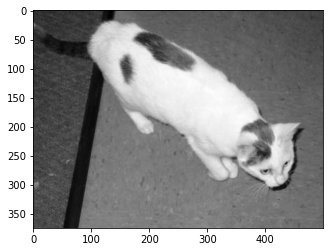

In [ ]:
DATADIR="/tmp/PetImages"
Categories=["Cat", "Dog"]
for category in Categories:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [ ]:
img_array.shape

(375, 500)

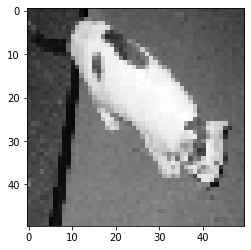

In [ ]:
IMG_SIZE=50

new_array=cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

In [ ]:
training_data=[]

def create_training_data():
    for category in Categories:
        path=os.path.join(DATADIR, category)
        class_num=Categories.index(category)
        for img in os.listdir(path):
           try:
                img_array=cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
           except Exception as e:
                pass
create_training_data()

In [ ]:
print(len(training_data))

24946


In [ ]:
import random
random.shuffle(training_data)

In [ ]:
for samples in training_data[:10]:
  print(samples[1])

0
0
1
0
0
1
1
1
0
1


In [ ]:
X=[]
y=[]
for features, labels in training_data:
    X.append(features)
    y.append(labels)
X=np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y=np.array(y)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Activation, MaxPooling2D, Flatten, Dropout

In [ ]:
X=X/255.0

In [ ]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
              )

In [ ]:
from tensorflow.keras.callbacks import TensorBoard
import time

In [ ]:
NAME=f"Difference_between_sports {int(time.time())}"
tensorboard=TensorBoard(log_dir=f"logs/{NAME}")
model.fit(X, y, batch_size=32, epochs=10,validation_split=0.4, callbacks=[tensorboard])

Epoch 1/10
468/468 [==============================] - 691s 1s/step - loss: 0.6408 - accuracy: 0.6328 - val_loss: 0.5949 - val_accuracy: 0.6875
Epoch 2/10
468/468 [==============================] - 723s 2s/step - loss: 0.5735 - accuracy: 0.7040 - val_loss: 0.5441 - val_accuracy: 0.7254
Epoch 3/10
468/468 [==============================] - 685s 1s/step - loss: 0.5364 - accuracy: 0.7339 - val_loss: 0.5412 - val_accuracy: 0.7285
Epoch 4/10
468/468 [==============================] - 686s 1s/step - loss: 0.5065 - accuracy: 0.7561 - val_loss: 0.5105 - val_accuracy: 0.7495
Epoch 5/10
468/468 [==============================] - 724s 2s/step - loss: 0.4843 - accuracy: 0.7724 - val_loss: 0.5124 - val_accuracy: 0.7498
Epoch 6/10
 76/468 [===>..........................] - ETA: 8:01 - loss: 0.4768 - accuracy: 0.7701

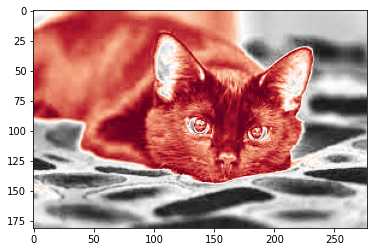

Cat


In [ ]:
import cv2
Categories=["Cat", "Dog"]

def prepared(path):
    IMG_SIZE=50
    img_array=cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    new_array=cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

prediction=model.predict([prepared("download (1).jpg")])
print(Categories[int(prediction[0][0])])